# Item I

*Classificação binária para prever se o vinho é tinto ou não (KNN)*

**1° Etapa:** leitura do arquivo e importação das bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**2° Etapa:** aplicação dos conceitos de classificação binária

In [6]:
data = np.loadtxt('winequality.csv', delimiter=',', skiprows=1)
array = np.delete(data, 0, 1)
X = data[:, 1:11] # excluimos o index e pegamos todos os dados exceto a ultima coluna
y = data[:, -1]   # a ultima coluna é o target, representado pelo Is_Red_Wine

print(X, y)       # Conferimos se o split foi realizado corretamente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Dividimos os dados em treino e teste

[[5.9     0.61    0.08    ... 0.99376 3.56    0.77   ]
 [8.2     1.      0.09    ... 0.99685 3.32    0.55   ]
 [6.4     0.24    0.49    ... 0.9942  3.01    0.98   ]
 ...
 [7.9     0.33    0.28    ... 1.0103  3.15    0.38   ]
 [7.      0.3     0.28    ... 0.99166 3.2     0.57   ]
 [6.4     0.22    0.49    ... 0.9948  3.27    0.52   ]] [1. 1. 0. ... 0. 0. 0.]


**3° Etapa:** Construindo as funções de classificação binária e KNN

In [7]:
# Aplicando classificação binária com KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Criando o modelo
k_neighbor = KNeighborsClassifier(n_neighbors=5)  # n_neighbors = número de vizinhos
k_neighbor.fit(X_train, y_train)                  # Treinando o modelo

y_pred = k_neighbor.predict(X_test)               # Fazendo a predição
accuracy_score(y_test, y_pred)                    # Avaliando a acurácia

print('Acurácia: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Acurácia: 93.31%


# Item I e II

*Classificação multiclasse para prever a qualidade do vinho - Aplicar ao algoritmo Random Forest e determinar quais features do dataset são mais importantes para o problema*

In [8]:
X = data[:, 1:12]       # Vamos utilizar apenas as 11 primeiras colunas (exluindo a coluna de Index, Quality e Cor do vinho)
y = data[:, 12]         # Coluna de Quality do vinho

print( X, y, "\nShape X: ", X.shape, "\nShape y: ", y.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)  # Dividindo os dados em treino e teste novamente

[[ 5.9   0.61  0.08 ...  3.56  0.77 11.1 ]
 [ 8.2   1.    0.09 ...  3.32  0.55  9.  ]
 [ 6.4   0.24  0.49 ...  3.01  0.98 10.5 ]
 ...
 [ 7.9   0.33  0.28 ...  3.15  0.38  8.8 ]
 [ 7.    0.3   0.28 ...  3.2   0.57 11.4 ]
 [ 6.4   0.22  0.49 ...  3.27  0.52 10.1 ]] [6. 6. 6. ... 6. 5. 6.] 
Shape X:  (6497, 11) 
Shape y:  (6497,)


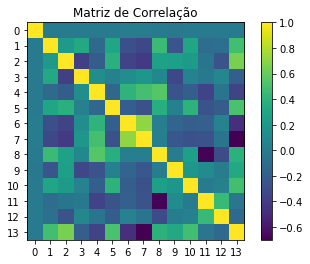

In [9]:
# Para prever a qualidade do vinho, primeiro extrairemos a matriz de correlação
# Centralizar os dados
data_centered = data - np.mean(data, axis=0)

# Calcular a matriz de covariância
cov_matrix = np.cov(data_centered, rowvar=False)

# Calcular as raízes quadradas das variâncias das variáveis correspondentes
sqrt_variances = np.sqrt(np.diag(cov_matrix))

# Normalizar a matriz de covariância para obter a matriz de correlação
correlation_matrix = cov_matrix / np.outer(sqrt_variances, sqrt_variances)

# Plotar o gráfico da matriz de correlação
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Correlação')
plt.xticks(np.arange(data.shape[1]))
plt.yticks(np.arange(data.shape[1]))
plt.show()

In [10]:
# Aplica o modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier

# Cria o modelo
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train2, y_train2)
y_pred2 = forest.predict(X_test2)

# Mede a acurácia
print('Acurácia: {:.2f}%'.format(accuracy_score(y_test2, y_pred2)*100))

Acurácia: 68.77%


# Item III

**RANDON FOREST E O RESULTADO ENCONTRADO:**

Com uma acurácia de 68%, percebemos que o modelo foi insuficiente para prever o resultado dos dados. Vamos extrair a matriz de confusão para entender melhor o que aconteceu e verificar o Feature Importance para entender quais variáveis foram mais importantes para o modelo.

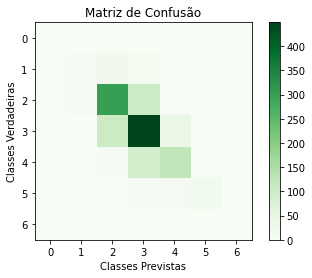

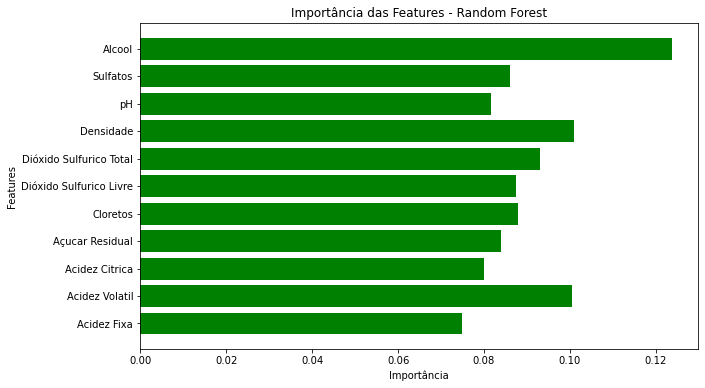

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix  # Usaremos a matriz de confusão para avaliar o modelo

cm = confusion_matrix(y_test2,y_pred2)

# Plotar a matriz de confusão como uma imagem
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.colorbar()
plt.xlabel("Classes Previstas")
plt.ylabel("Classes Verdadeiras")
plt.title("Matriz de Confusão")
plt.show()

# Lista de nomes das features
feature_names = ['Acidez Fixa', 'Acidez Volatil', 'Acidez Citrica', 'Açucar Residual', 'Cloretos', 'Dióxido Sulfurico Livre', 'Dióxido Sulfurico Total', 'Densidade', 'pH', 'Sulfatos', 'Alcool']
importance = forest.feature_importances_
# Plotar o gráfico de barras com a importância das features
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura, se necessário
plt.barh(range(len(importance)), importance, tick_label=feature_names, color='green')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features - Random Forest')
plt.show()

# Item IV

Aplicar a normalização nos dados e verificar os efeitos nos modelos

In [12]:
from sklearn.preprocessing import MinMaxScaler  # for normalization
X = data[:, 1:12]                               # Vamos utilizar apenas as 11 primeiras colunas (exluindo a coluna de Index, Quality e Cor do vinho)
y = data[:, 12]                                 # A coluna 12 é a coluna de qualidade do vinho
scaler = MinMaxScaler()                         # default=(0, 1)
X_normalizado = scaler.fit_transform(X, y)           # X_scaled is a numpy array

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Aplicando novamente os modelos KNN e Random Forest
k_neighbor = KNeighborsClassifier(n_neighbors=5)  # n_neighbors = número de vizinhos
k_neighbor.fit(X_train, y_train)                  # Treinando o modelo

y_pred = k_neighbor.predict(X_test)               # Fazendo a predição
acr_knn = accuracy_score(y_test, y_pred)

# -------------------------------------------------

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
y_pred2 = forest.predict(X_test)
acr_rf = accuracy_score(y_test, y_pred2)

print('Acurácia KNN Model: {:.2f}%'.format(acr_knn*100))
print('Acurácia RF Model: {:.2f}%'.format(acr_rf*100))


Acurácia KNN Model: 58.15%
Acurácia RF Model: 69.00%


**Observação:** Acabei verificando que o modelo KNN é extremamente insuficiente para a abordagem do problema, porém a normalização dos dados não foi suficiente para aumentar significativamente a acurácia do modelo Randon Forest. Achei uma fonte na internet descrita no README que realizou uma análise da quantidade de vinhos por grau de qualidade, portanto, importei a mesma interpretação do modelo.

Text(0, 0.5, 'Frequência')

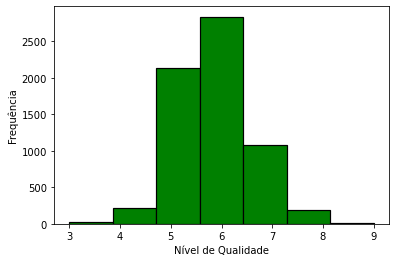

In [13]:
quality = data[:, 12:13]

plt.hist(quality, bins=7, color='green', edgecolor='black', linewidth=1.2)
plt.xlabel('Nível de Qualidade')
plt.ylabel('Frequência')

Notamos que há um desbalenceamento dos dados, o que pode interferir na decisão dos modelos utilizados, tornando-a enviesada. Para isso, usamos os conceitos de oversampling ou undersampling

*oversampling:* O oversampling envolve a replicação de exemplos da classe minoritária para aumentar sua proporção em relação à classe majoritária 

*undersampling:* O undersampling envolve a redução do número de exemplos da classe majoritária para equilibrá-la com a classe minoritária

Como as classes minoritárias são muito pequenas em relação aos dados, optamos por utilizar as técnicas de oversampling e aumentar a quantidade de modelos das classes minoritárias em relação as classes majoritárias.

In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

# Aplicação do Random Oversampling aos dados X_scaled e y_quality
X_ros, y_ros = ros.fit_resample(X_normalizado, y)

quality = data[:, 12:13]

plt.hist(quality, bins=7, color='green', edgecolor='black', linewidth=1.2)
plt.xlabel('Nível de Qualidade')
plt.ylabel('Frequência')

ModuleNotFoundError: No module named 'imblearn'